# Modeling CO2 Emissions through Gradient Descent

## **Setup**

#### **Importing Libraries**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### **Loading Data**


In [54]:
df = pd.read_csv('annual_global_CO2_levels', 
                 delimiter = "\t", 
                 names = ["Year", "CO2 Level"], 
                 skiprows = 1)

#### **Graphing Data**

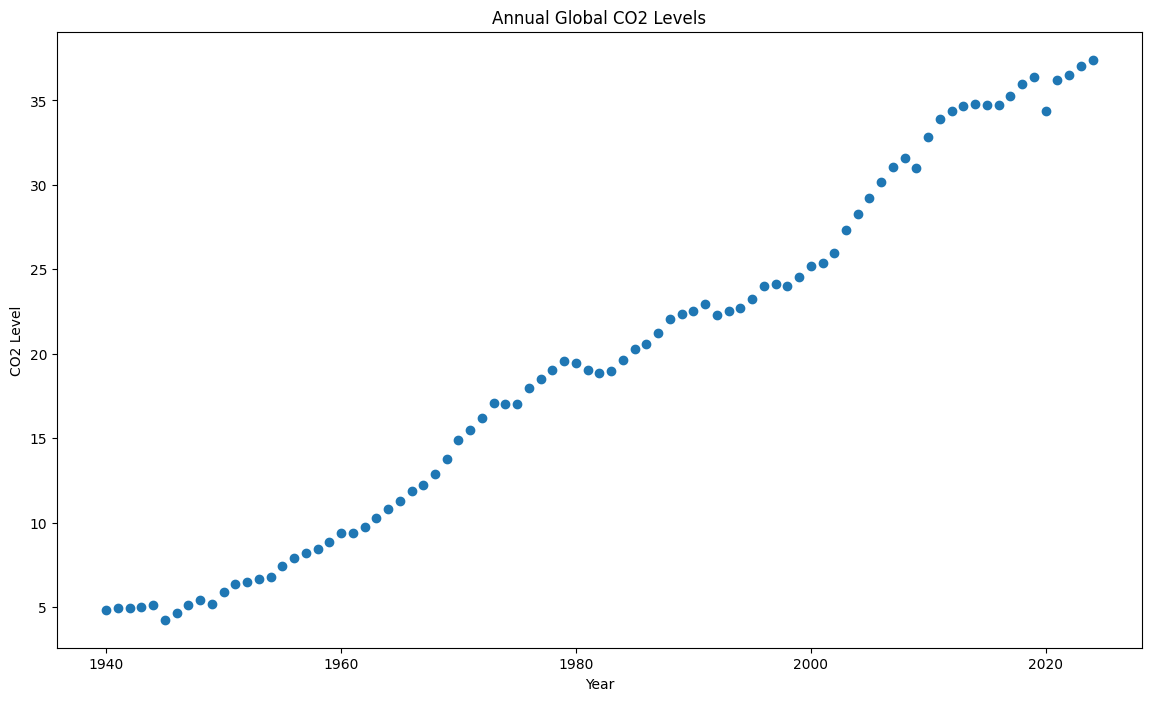

In [31]:
plt.figure(figsize = (14, 8))
plt.scatter(df['Year'], df['CO2 Level'])
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.show()

#### **Scaling Data**

Scaling is required here because the x-values are in thousands and the y-values are in single or double digits.

In [ ]:
x_values = df['Year'].values.astype(np.float32)
x_values = (x_values - x_values.min()) / (x_values.max() - x_values.min())

y_values = df['CO2 Level'].values.astype(np.float32)
y_values = (y_values - y_values.min()) / (y_values.max() - y_values.min())

#### **Splitting Data**

Splitting the data into training, validation, and testing sets.

In [75]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state = 13)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2, random_state = 13)

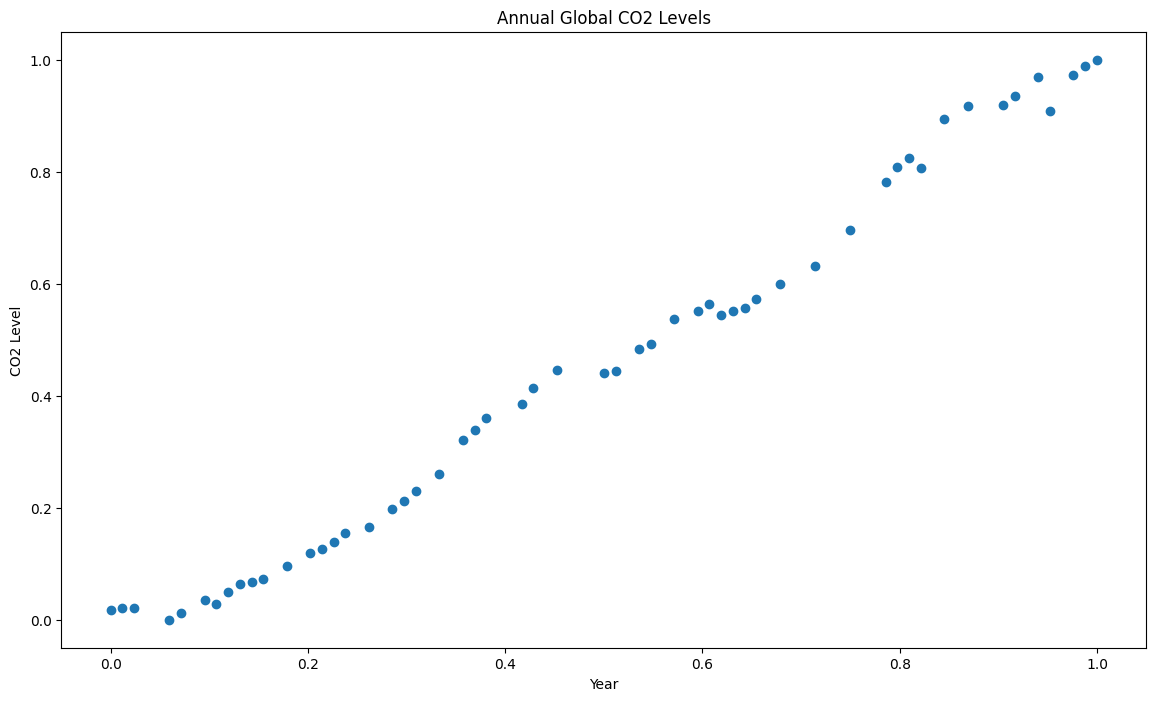

In [76]:
plt.figure(figsize = (14, 8))
plt.scatter(x_train, y_train)
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.show()

## **Modeling**

#### **Linear Model**

In [77]:
def linearModel(m: float, b: float, set:np.ndarray) -> float:
    return m * set + b

In [78]:
m = 1.0
b = 0.0

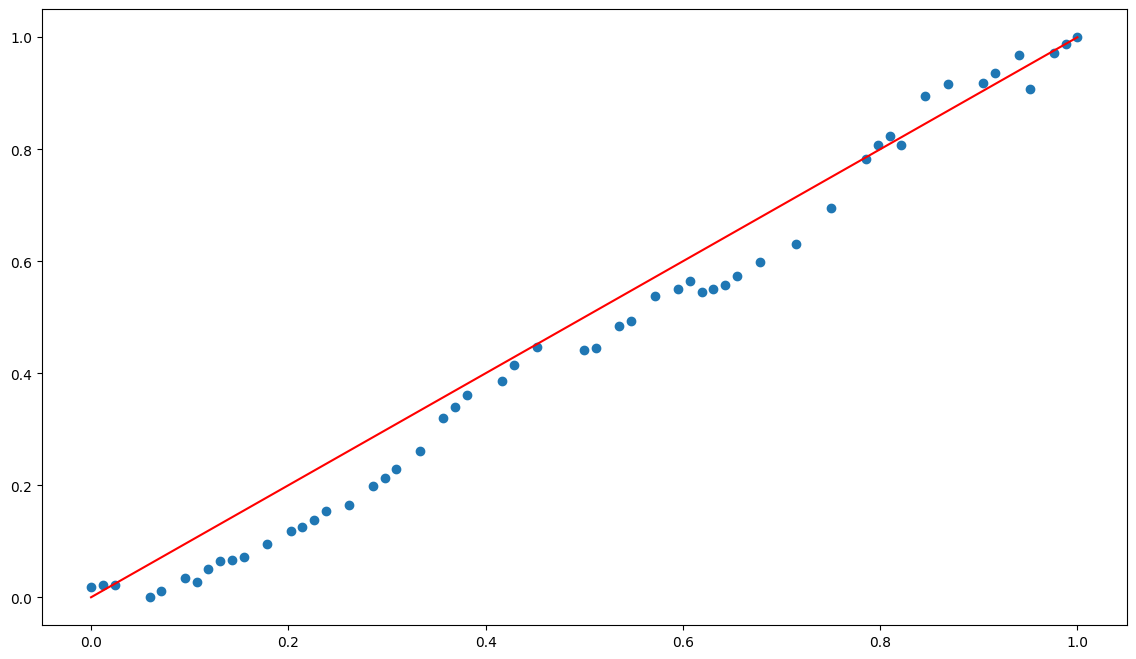

In [79]:
x = np.linspace(0, 1, 100)
y = linearModel(m, b, x)

plt.figure(figsize = (14, 8))
plt.plot(x, y, color = 'red')
plt.scatter(x_train, y_train)

plt.show()

That doesn't look too bad. Let's perform gradient descent and figure out our hyperparameters for the model using our validation set. I'll pick the error function to be the mean absolute error:

$$ E = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

In [80]:
def linearError(m: float, b: float, x:np.ndarray, y:np.ndarray) -> float:
    return np.mean((np.abs(linearModel(m, b, x) - y)))

In [81]:
# Hyperparameters
learning_rate = 1E-3
epochs = 1000

In [82]:
# Epoch data 
training_loss = []
validation_loss = []

# Training loop
for epoch in range(epochs):
    y_pred_train = m * x_train + b

    dm = np.mean(np.sign(y_pred_train - y_train) * x_train)
    db = np.mean(np.sign(y_pred_train - y_train))

    m = m - learning_rate * dm
    b = b - learning_rate * db

    y_pred_train = m * x_train + b
    loss = np.mean(np.abs(y_pred_train - y_train))
    training_loss.append(loss)

    y_pred_val = m * x_val + b
    val_loss = np.mean(np.abs(y_pred_val - y_val))
    validation_loss.append(val_loss)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: loss = {loss}')



# Print final loss and parameters
print("---------------------------------------")
print(f'Final Training Loss: {linearError(m, b, x_train, y_train)}')
print(f'Final Validation Loss: {linearError(m, b, x_val, y_val)}')
print(f'm: {m}, b: {b}')

Epoch 0: loss = 0.04978134110569954
Epoch 100: loss = 0.03656311333179474
Epoch 200: loss = 0.03437954932451248
Epoch 300: loss = 0.03278498724102974
Epoch 400: loss = 0.031533028930425644
Epoch 500: loss = 0.030946360900998116
Epoch 600: loss = 0.030433425679802895
Epoch 700: loss = 0.029996206983923912
Epoch 800: loss = 0.02955915778875351
Epoch 900: loss = 0.02917579747736454
---------------------------------------
Final Training Loss: 0.028971537947654724
Final Validation Loss: 0.040971990674734116
m: 1.0556466005482283, b: -0.07529629651829721


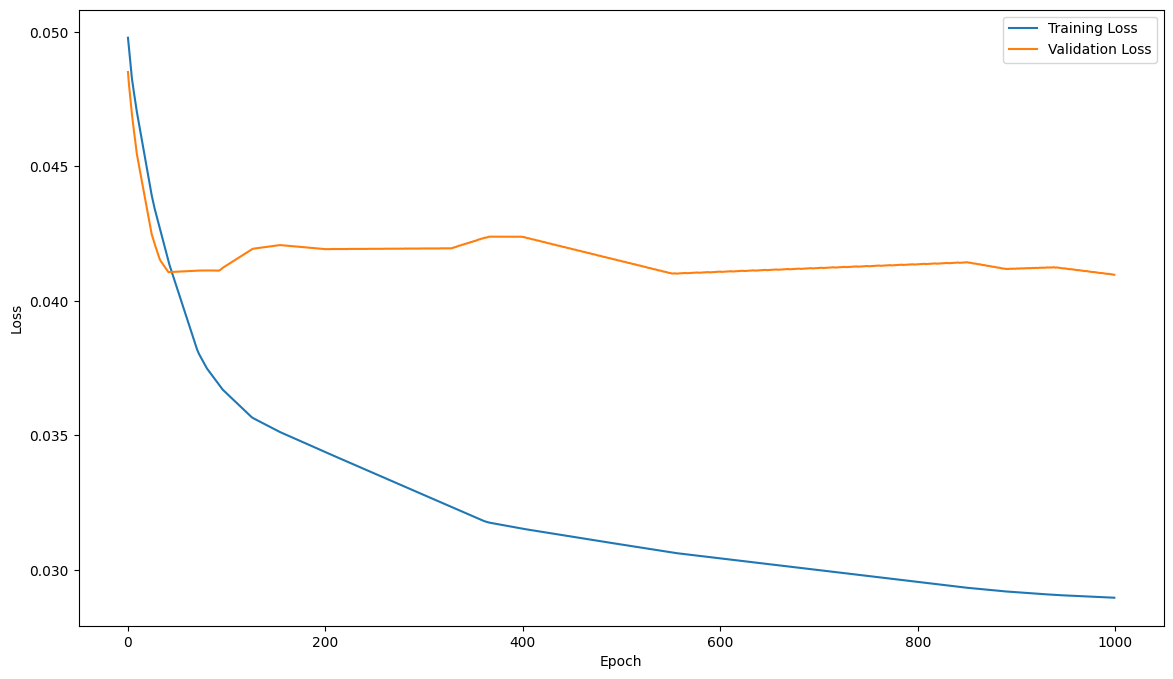

In [83]:
plt.figure(figsize = (14, 8))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

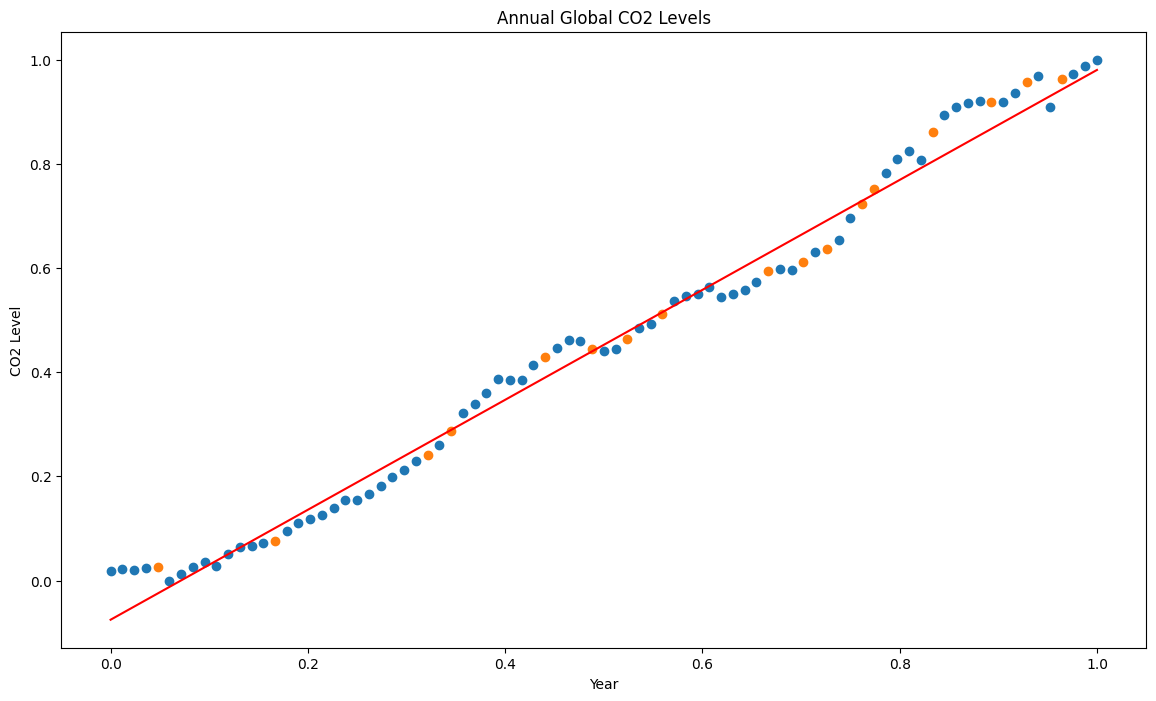

In [84]:
#plot our model with our data 
x = np.linspace(0, 1, 200)
y = linearModel(m, b, x)
plt.figure(figsize = (14, 8))
plt.plot(x, y, 'r')
plt.scatter(x_train_val, y_train_val)
plt.scatter(x_test, y_test) 
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.show()